# Identify the factors causing the traffic congestion 
Objective : To build a model that predicts the slowness in the traffic for a given day for given time period
            Find accuracy of the predictions made by the model.
Data Source: data.arff

#### Importing required libraries

In [26]:
# Pandas
import pandas as pd

# Numpy
import numpy as np

import seaborn as sns
from scipy import stats

#Mathplot
import matplotlib.pyplot as plt

import arff

from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2


from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeRegressor 
from sklearn.feature_selection import SelectFromModel
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from statsmodels.formula.api import ols
from sklearn.metrics import confusion_matrix



#### Reading the data Set

In [27]:
data_arff = arff.load('data.arff')

#### Modifying the Arff file to make it readable

In [28]:
with open("data.arff", "rt") as fin:
    with open("data1.arff", "wt") as fout:
        for line in fin:
            if line.strip("\n")!="12:30, 0.0, 1000.0, F, 0.0, NO, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.7":
                fout.write(line.upper().replace(', ,', ',NaN,').replace('INTEGER', 'REAL').replace('STRING', 'REAL').replace(', T', ',T').replace(', NO', ',NO').replace(', F', ',F').replace(', YES', ',YES'))
            

#### Loading Modified arff file to dataframe

In [29]:
dataarff = arff.load('data1.arff')

In [30]:

datax = pd.DataFrame(dataarff)
data = pd.DataFrame(datax.values,columns = ['Hour','Immobilized_bus','Broken_Truck','Vehicle_excess','Accident_victim','Running_over','Fire_vehicles','Occurrence_involving_freight',
                         'Incident_involving_dangerous_freight','Lack_of_electricity','Fire','Point_of_flooding','Manifestations',
                         'Defect_in_the_network_of_trolleybuses','Tree_on_the_road','Semaphore_off','Intermittent_Semaphore','Slowness_in_traffic_percent'])

In [31]:
data.head()

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
0,7:00,0,0,T,0,0,NO,0,0,0,0,0,0,0,0,0,0,4.1
1,7:30,0,0,F,0,0,NO,0,0,0,0,0,0,0,0,0,0,6.6
2,8:00,0,0,F,0,0,NO,0,0,0,0,0,0,0,0,0,0,8.7
3,8:30,0,0,F,0,0,NO,0,0,0,0,0,0,0,0,0,0,9.2
4,9:00,0,0,F,0,0,NO,0,0,0,0,0,0,0,0,0,0,11.1


#### Describing the dataSet

In [32]:
#No of Rows, columns
data.shape

(139, 18)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 18 columns):
Hour                                     139 non-null object
Immobilized_bus                          139 non-null object
Broken_Truck                             139 non-null object
Vehicle_excess                           139 non-null object
Accident_victim                          137 non-null object
Running_over                             139 non-null object
Fire_vehicles                            139 non-null object
Occurrence_involving_freight             139 non-null object
Incident_involving_dangerous_freight     137 non-null object
Lack_of_electricity                      139 non-null object
Fire                                     139 non-null object
Point_of_flooding                        139 non-null object
Manifestations                           139 non-null object
Defect_in_the_network_of_trolleybuses    137 non-null object
Tree_on_the_road                         

Below, the variables have been defined in different category:

#### Numeric Variable 
1. Immobilized_bus  
2. Broken_Truck  
3. Accident_victim  
4. Running_over  
5. Occurrence_involving_freight  
6. Incident_involving_dangerous_freight  
7. Lack_of_electricity  
8. Fire  
9. Point_of_flooding  
10. Manifestations  
11. Defect_in_the_network_of_trolleybuses  
12. Tree_on_the_road  
13. Semaphore_off  
14. Intermittent_Semaphore  

#### Binary Variable
1. Vehicle_excess
2. Fire_vehicles

#### Nominal Variable
1. Hour

#### Target Variable  
1. Slowness_in_traffic_percent
    

In [34]:
NumericDataAttributes = ['Immobilized_bus','Broken_Truck','Accident_victim','Running_over','Occurrence_involving_freight','Incident_involving_dangerous_freight','Lack_of_electricity','Fire','Point_of_flooding','Manifestations','Defect_in_the_network_of_trolleybuses','Tree_on_the_road','Semaphore_off','Intermittent_Semaphore']
NominalDataAttributes = ['Hour','Vehicle_excess','Fire_vehicles']


In [35]:
# Forcing Attribute types for computation and finding negative values if any
for item in NumericDataAttributes:
    data[item] = data[item].astype('float64')
    print(item,(data[item] < 0).sum())
    
for item in NominalDataAttributes:
    data[item] = data[item].astype('category')
    


Immobilized_bus 0
Broken_Truck 0
Accident_victim 0
Running_over 1
Occurrence_involving_freight 0
Incident_involving_dangerous_freight 0
Lack_of_electricity 0
Fire 0
Point_of_flooding 0
Manifestations 1
Defect_in_the_network_of_trolleybuses 1
Tree_on_the_road 0
Semaphore_off 0
Intermittent_Semaphore 0


#### The above data indicates that Running_over , Manifestations and Defect_in_the_network_of_trolleybuses has one negative value each

In [36]:
# Summarize the central tendency, dispersion and shape of a dataset’s distribution
data.describe()

,Immobilized_bus,Broken_Truck,Accident_victim,Running_over,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore
count,139.000000,139.000000,137.000000,139.000000,139.000000,137.000000,139.000000,139.000000,139.000000,139.000000,137.000000,139.000000,138.000000,139.000000
mean,0.338129,0.870504,0.452555,0.100719,0.007194,0.007299,0.115108,0.007194,14.503597,0.035971,0.102190,0.043165,0.130435,0.014388
std,0.654460,1.095674,0.727312,0.346723,0.084819,0.085436,0.497518,0.084819,169.629407,0.222309,0.825019,0.203964,0.465230,0.119517
min,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-8.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,5.000000,3.000000,2.000000,1.000000,1.000000,4.000000,1.000000,2000.000000,1.000000,3.000000,1.000000,4.000000,1.000000


There are 139 records in the data set (1 record already removed due to Outlier value). The average value of slowness in traffice is 10.01%

A) The above measures indicate that Point_of_Flooding have an oulier data in them.  
B) The one negative value for the attribute Running_over is -1 , Manifestations is -1 and Defect_in_the_network_of_trolleybuses is -8

#### Data Preparation and Cleaning
Finding the missing values

In [37]:
data.isnull().sum()

Hour                                     0
Immobilized_bus                          0
Broken_Truck                             0
Vehicle_excess                           0
Accident_victim                          2
Running_over                             0
Fire_vehicles                            0
Occurrence_involving_freight             0
Incident_involving_dangerous_freight     2
Lack_of_electricity                      0
Fire                                     0
Point_of_flooding                        0
Manifestations                           0
Defect_in_the_network_of_trolleybuses    2
Tree_on_the_road                         0
Semaphore_off                            1
Intermittent_Semaphore                   0
Slowness_in_traffic_percent              0
dtype: int64

#### There are values that are missing for the columns 

1) Accident_victim  
2) Incident_involving_dangerous_freight   
3) Defect_in_the_network_of_trolleybuses  
4) Semaphore_off  

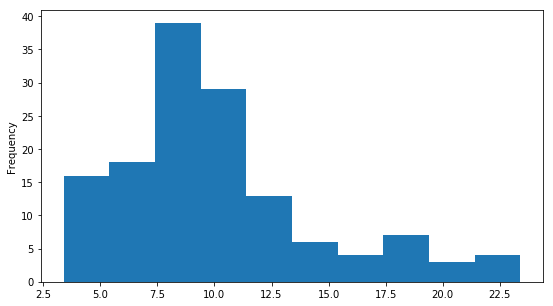

In [38]:
#to check correlation between numerical attributes. 
plt.figure(figsize = (9, 5)) 
data['Slowness_in_traffic_percent'].plot(kind ="hist")


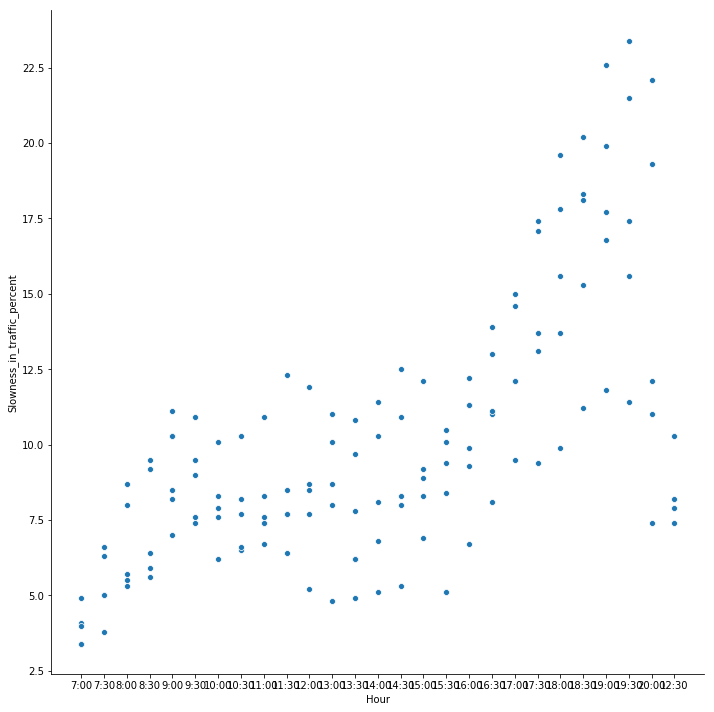

In [39]:

sns.pairplot(data, x_vars=['Hour'],
             y_vars='Slowness_in_traffic_percent', height=10)

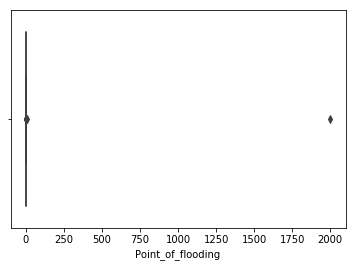

In [40]:
sns.boxplot(x=data['Point_of_flooding']) 

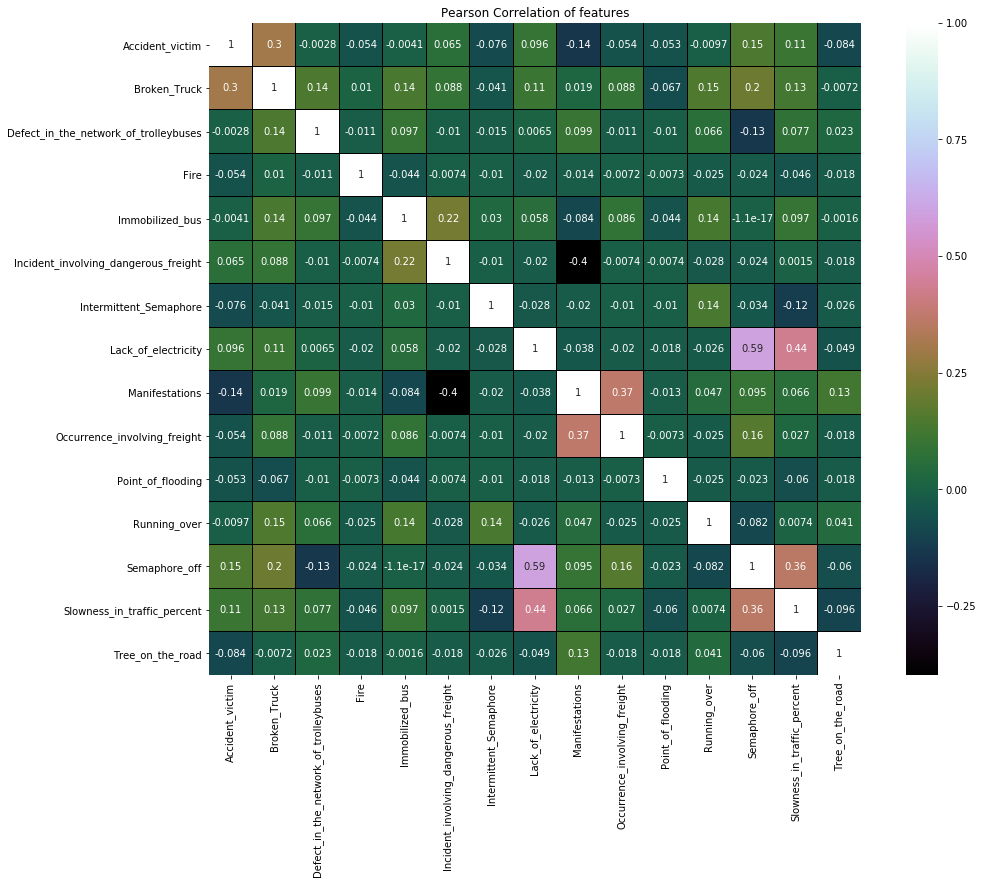

In [41]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in data.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = data.columns.difference(str_list) 
# Create Dataframe containing only numerical features
data_num = data[num_list]


f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
sns.heatmap(data_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

#### Scatter plot for Intermittent_Semaphore, Semaphore_off, Tree_on_the_road, Vehicle_excess with Slowness in Traffic

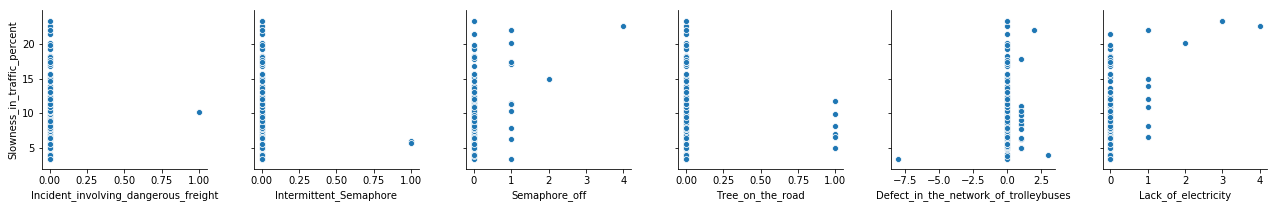

In [42]:
sns.pairplot(data, x_vars=['Incident_involving_dangerous_freight','Intermittent_Semaphore','Semaphore_off','Tree_on_the_road','Defect_in_the_network_of_trolleybuses','Lack_of_electricity'],
             y_vars='Slowness_in_traffic_percent', height=3)

#### Now we go ahead and remove the Outlier Data

In [43]:
# Removing the Outlier data
z = np.abs(stats.zscore(data['Point_of_flooding']))
data['Point_of_flooding'] = data['Point_of_flooding'][(z < 3)]


#### Removing the negative value

In [44]:
# Removing the negative value by making it positive under the assumption that this is data entry error
num = data._get_numeric_data()
num[num < 0] = num*-1

We have selected Median as the Imputing Strategy for Numeric Attributes 
Most Frequent as the Imputing Strategy for Nomial data

#### We also selected LinearRegression(),Ridge(),Lasso() model for computing the Target variable - Slowness in Traffic

In [45]:
# Numeric Data Imputing Stratergy
numericImputingStratergy = 'median'
# Since the variation in the data is quite less

# Nominal Data Imputing Stratergy
nominalImputingStratergy = 'most_frequent'

#Binary Data Imputing Strategy

# Regressor List
RegressorList = [LinearRegression(),Ridge(),Lasso()]

# Selecting Linear Regression, Ridge and Lasso for Fitting and Predicting the Data

####  Splitting the  X (independent attributes) and Y for prediction and dataset into the Training set and Test set

In [46]:
X = data.drop('Slowness_in_traffic_percent', axis=1)
Y = data['Slowness_in_traffic_percent']
columns = data.columns.drop('Slowness_in_traffic_percent')
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3)

#### Standardizing the data for model evaluation and selection

In [47]:
NumericImputer = SimpleImputer(missing_values=np.NaN, strategy=numericImputingStratergy).fit(X_Train[NumericDataAttributes])
CategoricalImputer = SimpleImputer(missing_values=np.NaN, strategy=nominalImputingStratergy).fit(X_Train[NominalDataAttributes])
    
X_Train_Numeric_Imputed = NumericImputer.transform(X_Train[NumericDataAttributes])
X_Test_Numeric_Imputed = NumericImputer.transform(X_Test[NumericDataAttributes])
    
X_Train_Nominal_Imputed = CategoricalImputer.transform(X_Train[NominalDataAttributes])
X_Test_Nominal_Imputed = CategoricalImputer.transform(X_Test[NominalDataAttributes])
    
Nominal_Encoder = OneHotEncoder(handle_unknown='ignore').fit(X_Train_Nominal_Imputed)
    
X_Train_Nominal_Encoded =  Nominal_Encoder.transform(X_Train_Nominal_Imputed)
X_Test_Nominal_Encoded =  Nominal_Encoder.transform(X_Test_Nominal_Imputed)
    
X_Train_PreProcessed = pd.concat([pd.DataFrame(X_Train_Numeric_Imputed), pd.DataFrame(X_Train_Nominal_Encoded.todense())], axis=1)
X_Test_PreProcessed = pd.concat([pd.DataFrame(X_Test_Numeric_Imputed), pd.DataFrame(X_Test_Nominal_Encoded.todense())], axis=1)


### Fitting the Data

In [48]:
def Regression(X_Train_PreProcessed,Y_Train,X_Test_PreProcessed,Y_Test):
    resultsColumns = ["Model","Mean Absolute Error","Mean Squared Error","Root Mean Squared Error"]
    resultsFrame = pd.DataFrame(columns=resultsColumns)
    for lr in RegressorList:
        print(lr.__class__.__name__)
        lr.fit(X_Train_PreProcessed, Y_Train) #Fitting the dataset
        Y_Pred = lr.predict(X_Test_PreProcessed) # Prediction 
        df = pd.DataFrame({'Actual': Y_Test, 'Predicted': Y_Pred})
        df.head(25).plot(kind='bar',figsize=(10,6))
        plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
        plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        plt.show()
        mae = metrics.mean_absolute_error(Y_Test, Y_Pred)
        mse = metrics.mean_squared_error(Y_Test, Y_Pred)
        msse = np.sqrt(metrics.mean_squared_error(Y_Test, Y_Pred))
        r = {resultsColumns[0]:[lr.__class__.__name__],resultsColumns[1]:[mae],resultsColumns[2]:[mse],resultsColumns[3]:[msse]}
        resultsFrame = resultsFrame.append(pd.DataFrame(r, columns=resultsColumns)) 
        resultsFrame = resultsFrame.sort_values(by=resultsColumns[3])  
    print (resultsFrame)
    
    

#### Defining Dictonary for Storing Rankings specific to Recursive Feature Elimination

In [49]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

# Applying Model to Predict Target Variable

LinearRegression


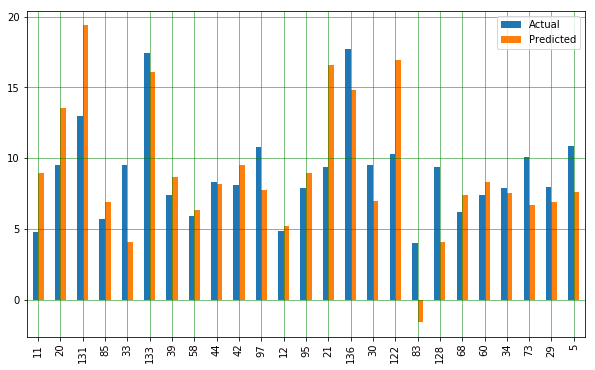

Ridge


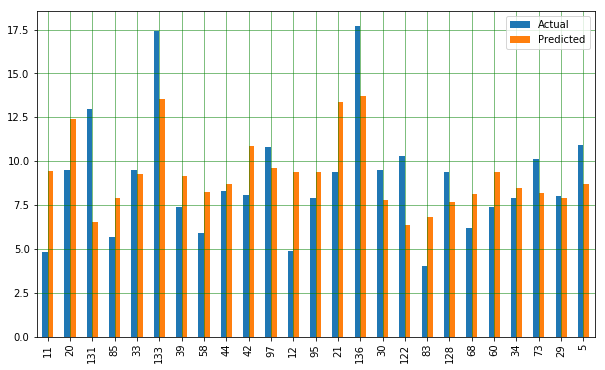

Lasso


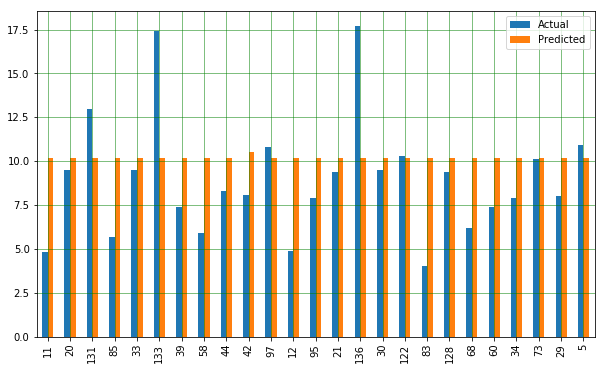

              Model  Mean Absolute Error  Mean Squared Error  \
0             Ridge             2.441537            9.394780   
0             Lasso             2.832793           12.713886   
0  LinearRegression             3.153956           18.252356   

   Root Mean Squared Error  
0                 3.065091  
0                 3.565654  
0                 4.272278  


In [50]:
Regression(X_Train_PreProcessed,Y_Train,X_Test_PreProcessed,Y_Test)



#### The above matrix indicate that Ridge is better model in comparision to  LinearRegression, Lasso

# Marking the attributes by their Importance

In [51]:
# Finally let's run our Selection Stability method with Randomized Lasso
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X_Train_PreProcessed, Y_Train)
ranks["rlasso/Stability"] = ranking(np.abs(rlasso.scores_), columns)


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


In [52]:
# Construct our Linear Regression model
lr = LinearRegression(normalize=True)
lr.fit(X_Train_PreProcessed, Y_Train)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X_Train_PreProcessed, Y_Train)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), columns, order=-1)

In [53]:
# Construct RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50)
rf.fit(X_Train_PreProcessed, Y_Train)
ranks["RF"] = ranking(rf.feature_importances_, columns)

# Plotting the Values by Feature Importance

In [54]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in columns:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

print("\t\t\t\t\t%s" % "\t".join(methods))
for name in columns:
    #featureranking = pd.DataFrame(name)
                                
                                
                                #,pd.DataFrame(map(str,[ranks[method][name] for method in methods]))],axis=1)
    
    print("%s\t\t\t\t%s" % (name, "\t\t".join(map(str,[ranks[method][name] for method in methods]))))



					RF	RFE	rlasso/Stability	Mean
Hour				0.03		0.09		0.22		0.11
Immobilized_bus				0.15		0.02		0.27		0.15
Broken_Truck				0.12		0.07		0.06		0.08
Vehicle_excess				0.04		0.0		0.02		0.02
Accident_victim				0.0		0.25		0.0		0.08
Running_over				0.0		0.11		0.0		0.04
Fire_vehicles				0.34		0.2		0.81		0.45
Occurrence_involving_freight				0.01		0.16		0.0		0.06
Incident_involving_dangerous_freight				1.0		0.23		0.86		0.7
Lack_of_electricity				0.01		0.14		0.08		0.08
Fire				0.05		0.18		0.31		0.18
Point_of_flooding				0.04		0.27		0.11		0.14
Manifestations				0.09		0.05		0.44		0.19
Defect_in_the_network_of_trolleybuses				0.0		0.45		0.0		0.15
Tree_on_the_road				0.01		0.52		0.13		0.22
Semaphore_off				0.01		0.41		0.45		0.29
Intermittent_Semaphore				0.01		0.57		0.1		0.23


/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


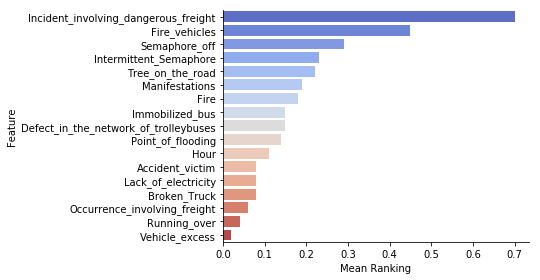

In [55]:
# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", size=4, aspect=1.9, palette='coolwarm')

The above matrix indicates that Incidents Involving dangerous freight, Fire vehicles and Manifestations are the three important attributes


# Applying the Prediction Model Again with the Features Selected

LinearRegression


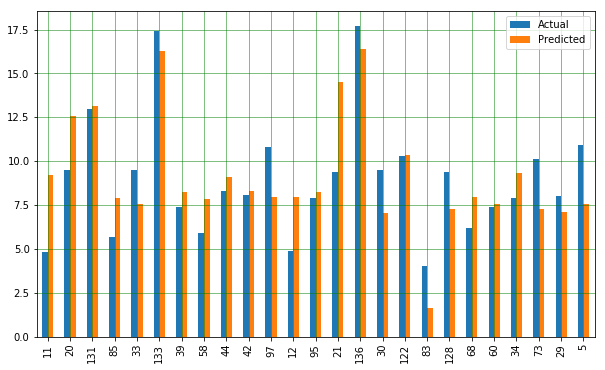

Ridge


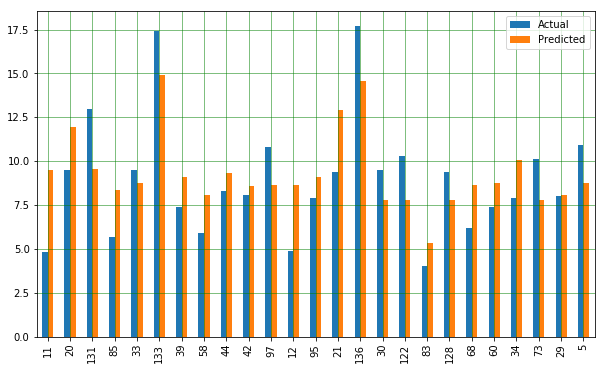

Lasso


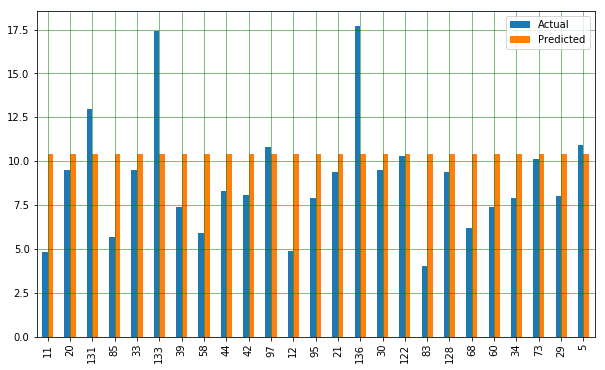

              Model  Mean Absolute Error  Mean Squared Error  \
0             Ridge             2.192830            6.904735   
0  LinearRegression             2.183352            7.992915   
0             Lasso             2.933456           13.184090   

   Root Mean Squared Error  
0                 2.627686  
0                 2.827174  
0                 3.630990  


In [56]:
X_Train_rfe = X_Train_Numeric_Imputed[:,[5,12,11]]
X_Test_rfe = X_Test_Numeric_Imputed[:,[13,12,11]]

X_Train_PreProcessed_rfe = pd.concat([pd.DataFrame(X_Train_rfe), pd.DataFrame(X_Train_Nominal_Encoded.todense())], axis=1)
X_Test_PreProcessed_rfe = pd.concat([pd.DataFrame(X_Test_rfe), pd.DataFrame(X_Test_Nominal_Encoded.todense())], axis=1)

Regression(X_Train_PreProcessed_rfe,Y_Train,X_Test_PreProcessed_rfe,Y_Test)


# We can see that there is No drop in the accuracy after selecting 5 features instead of all 17 features,  infact we can see an imporvement in all the model evaluation Parameters